# 並行座標プロット

## 概要

**並行座標プロット（Parallel Coordinates Plot）** は，複数の量的変数を，平行に並べた **直線上の位置** で表現するグラフです．
[パラレルセットグラフ](https://kakeami.github.io/viz-madb/charts4props/parallel.html)と似ていますが，並行座標プロットは **量的変数** を対象としている点が異なります．
パラレルセットグラフと同様，隣り合う変数同士の関係を眺めることはできますが，それ以外の変数同士の関係を読み取るのは困難です．

![](../figs/charts/slope.png)

例えば上図は，作品ごとの平均掲載位置と平均ページ数と掲載週数の関係を表した並行座標プロットです．
かろうじて

- 平均掲載位置と平均ページ数
- 平均ページ数と掲載週数

の関係は **なんとなく** わかりますが， 平均掲載位置と掲載週数の関係を解釈するのは困難です．

## Plotlyによる作図方法

Plotlyにおいては，`plotly.express.parallel_coordinates()`を用いて並行座標プロットを作図できます．

```python
import plotly.express as px
fig = px.parallel_coordinates(
    df, dimensions=['col_0', 'col_1', 'col_2'])
```

上記の例では，`df`の `col_0`・`col_1`・`col_2`列を対象として，並行座標プロットのオブジェクト`fig`を作成します．
この例では三変数ですが，`dimensions`ではそれ以上の変数も指定可能です．
[パラレルセットグラフ](https://kakeami.github.io/viz-madb/charts4props/parallel.html)と同様に，最も重要な変数に対して`color`で色付けすると解釈性が上がって親切です．

## MADB Labを用いた作図例

### 下準備

In [19]:
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [20]:
# 前処理の結果，以下に分析対象ファイルが格納されていることを想定
PATH_DATA = '../../data/preprocess/out/episodes.csv'
# Jupyter Book用のPlotlyのrenderer
RENDERER = 'plotly_mimetype+notebook'

In [21]:
# 連載週数の最小値
MIN_WEEKS = 5

In [22]:
def show_fig(fig):
    """Jupyter Bookでも表示可能なようRendererを指定"""
    fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
    fig.show(renderer=RENDERER)

In [23]:
df = pd.read_csv(PATH_DATA)

### 作品別の平均掲載位置と連載週数

試しに，二変数に対して並行座標プロットを作成してみましょう．

In [7]:
df_plot = \
    df.groupby('cname')['pageStartPosition'].\
    agg(['count', 'mean']).reset_index()
df_plot.columns = ['cname', 'weeks', 'position']
df_plot = df_plot[['cname', 'position', 'weeks']]
df_plot = \
    df_plot[df_plot['weeks'] >= MIN_WEEKS].reset_index(drop=True)

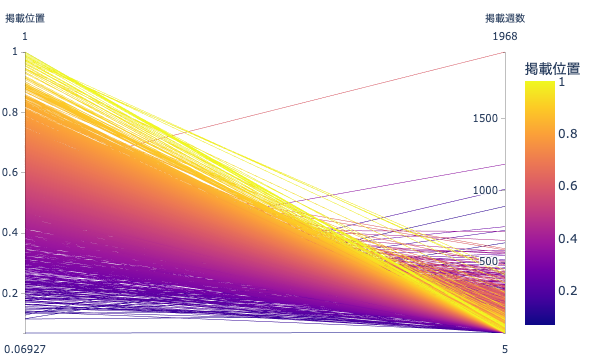

In [24]:
fig = px.parallel_coordinates(
    df_plot, dimensions=['position', 'weeks'],
    color='position',
    labels={'position': '掲載位置', 'weeks': '掲載週数'})
show_fig(fig)

逆相関があるように見えますが，直線が重複しているためよくわかりません．
個人的には，この用途であれば[散布図](https://kakeami.github.io/viz-madb/charts4assocs/scatter.html#id4)を選択します．

### 作品別の平均掲載位置と連載週数と平均ページ数

並行座標プロットが本領を発揮するのは，散布図で手が出ない三変数以上を対象としたときです．

In [25]:
df_plot = \
    df.groupby(['mcname', 'cname'])\
    [['pages', 'pageStartPosition']].\
    agg(['count', 'mean']).reset_index()
df_plot.columns = [
    'mcname', 'cname', 'weeks', 'pages',
    '_weeks', 'position']
df_plot = \
    df_plot[df_plot['weeks'] >= MIN_WEEKS].reset_index(drop=True)

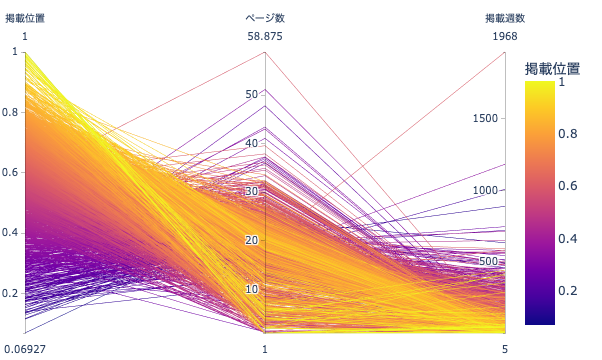

In [26]:
fig = px.parallel_coordinates(
    df_plot, dimensions=['position', 'pages', 'weeks'],
    color='position',
    labels={
        'position': '掲載位置', 'weeks': '掲載週数',
        'pages': 'ページ数'})
show_fig(fig)

冒頭で説明したように，隣り合う変数同士の関係は **なんとなく** わかりますが，それ以外の変数同士の関係はよくわかりません．
個人的には，この用途であれば[バブルチャート](https://kakeami.github.io/viz-madb/charts4assocs/scatter.html#id6)か[散布図行列](https://kakeami.github.io/viz-madb/charts4assocs/scatter.html#id7)を用います．